In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from fvhoe.hydro import compute_conservatives, advection_dt
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver

In [2]:
N = 64
p = 3

solver = EulerSolver(
    w0=square,
    nx=N,
    px=p,
    riemann_solver="advection_upwind",
    fixed_dt=advection_dt(hx=1 / N, vx=1),
)

In [3]:
solver.rkorder(1, downbeats=[0.5])

100%|██████████| 1.0/1 [00:03]                 


t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.50, x=[0.01, 0.99], y=0.50, z=0.50
t=1.00, x=[0.01, 0.99], y=0.50, z=0.50


Text(0, 0.5, '$\\overline{\\rho}$')

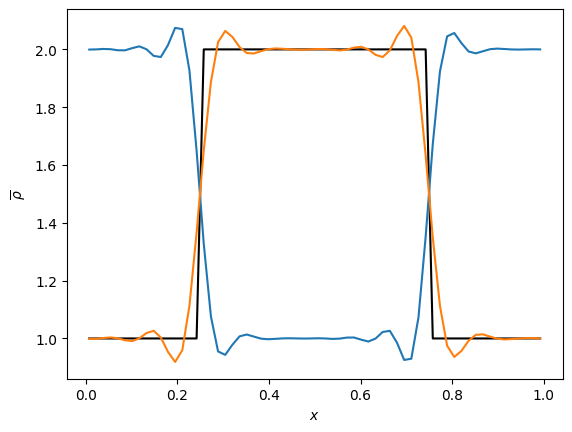

In [4]:
fig, ax = plt.subplots()

param = "rho"
solver.plot_1d_slice(ax, t=0, color="k", param=param, y=0.5, z=0.5)
solver.plot_1d_slice(ax, t=0.5, param=param, y=0.5, z=0.5)
solver.plot_1d_slice(ax, t=1, param=param, y=0.5, z=0.5)

ax.set_xlabel("$x$")
ax.set_ylabel(r"$\overline{\rho}$")

In [5]:
for n in [0, -1]:
    m_tot = np.sum(solver.snapshots[n]["fv"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {solver.snapshot_times[n]}: {m_tot}")

Total mass at time 0: 1.5
Total mass at time 1.0: 1.5
